<a href="https://colab.research.google.com/github/Samxiar/ML/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Polynomial regression is a form of regression analysis where the relationship between the independent variable (input) and the dependent variable (output) is modeled as an nth-degree polynomial. The formula for polynomial regression can be expressed as follows:*

**Simple Polynomial Regression:**
```
y = β0 + β1*x + β2*x^2 + β3*x^3 + ... + βn*x^n + ε
```

- `y` is the dependent variable (the one you want to predict).
- `x` is the independent variable (the input feature).
- `β0, β1, β2, ..., βn` are the coefficients of the polynomial terms, which represent the weights of each term in the polynomial equation. These coefficients are determined during the training of the regression model.
- `n` is the degree of the polynomial, which determines the highest power of `x` in the equation.
- `ε` represents the error term, which accounts for the variability in the data that is not explained by the polynomial equation.

**Multiple Polynomial Regression:**
In practice, you can have multiple independent variables (features) in a multiple polynomial regression. The formula extends to:

```
y = β0 + β1*x1 + β2*x2 + β3*x1^2 + β4*x2^2 + β5*x1*x2 + ... + ε
```

- `x1`, `x2`, etc. represent different independent variables or features.
- `β0, β1, β2, ..., βn` are the coefficients for the polynomial terms, which can include terms involving multiple features.
- `ε` represents the error term, as before.

The goal of polynomial regression is to find the values of the coefficients (β0, β1, β2, etc.) that best fit the given data, minimizing the sum of squared errors between the predicted values and the actual data points. This is typically done using optimization techniques or linear algebra methods.

The degree of the polynomial (n) is a hyperparameter that you can adjust based on the complexity of the relationship between the variables. Higher-degree polynomials can capture more complex patterns but may also be prone to overfitting if the degree is too high relative to the amount of data available.

In [1]:
pip install palmerpenguins

In [2]:
# Importing necessary Libraries.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
import tensorflow_datasets as tfds
import palmerpenguins as penguins
from sklearn.impute import SimpleImputer

In [3]:
#loading the data and extracting the feature fo the penguins along with the target variable(s)
data = penguins.load_penguins()

x = np.array(data["flipper_length_mm"]).reshape(-1, 1)
y = np.array(data["body_mass_g"]).reshape(-1, 1)

In [4]:
#Filling the NaN values.
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)
imputer_y = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y)

In [5]:
#degree of the polynomial can vary from case to case.
degree = 2

poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

In [6]:
# Polynomial Regression Model.

model = LinearRegression()
model.fit(x_poly, y)



LinearRegression()

In [7]:
x_predict = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_predict_poly = poly_features.transform(x_predict)
y_predict = model.predict(x_predict_poly)

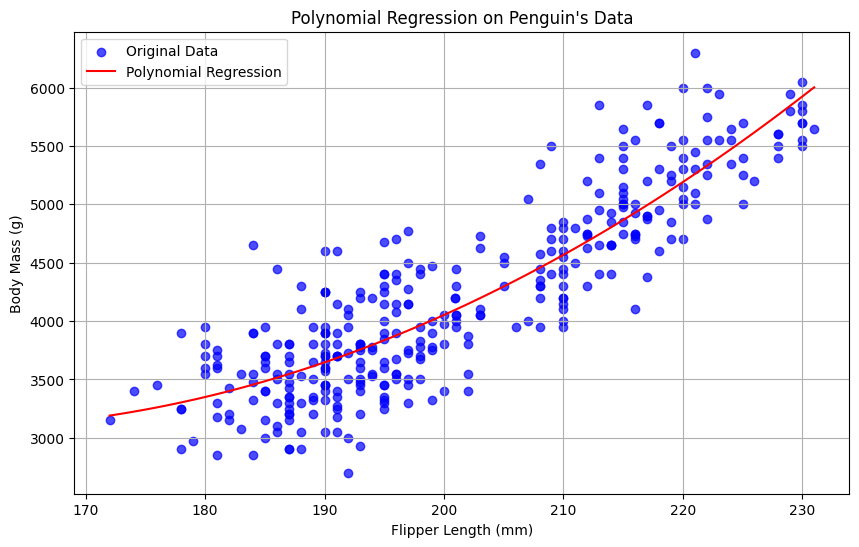

In [8]:
#Visuals

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data', color='blue', alpha=0.7)
plt.plot(x_predict, y_predict, color='red', label='Polynomial Regression')
plt.xlabel('Flipper Length (mm)') #(penguins have tapered, flattened flippers for swimming.)
plt.ylabel('Body Mass (g)')
plt.title("Polynomial Regression on Penguin's Data")
plt.legend()
plt.grid(True)
plt.show()